# CSE185 Lab 5 Report - Code Documentation (10 pts)

* Document any commands used or additional analysis steps below!
* You should include enough detail that the instructors (or your future self) could come back to this several months from now and know exactly what you did and why you did it.
* We will not run this notebook, but will look back to see what you did especially if you end up with different answers.

**Question#1**:
The first thing I did is just check the number of lines in each file so it gives me a general handle of how many reads I am looking at. The command I used to see the number of lines in each file was <font color="red">"wc -l *"</font>. 

This outputted:
```
wc: exercises: Is a directory
         0 exercises
   1899747 GRCm38.chr17.fa
   6844668 H3K27ac.esc.fastq
   7999992 H3K4me2.esc.fastq
   7999992 input.esc.fastq
   7999992 Klf4.esc.fastq
wc: motifs: Is a directory
         0 motifs
   7999992 Oct4.esc.fastq
        48 OCT4_motif.meme
   7999992 Sox2.esc.fastq
  48744423 total
```
I divided each one by four to get the actual read count. Which gives me:
   1711167=H3K27ac.esc.fastq;
   1999998=H3K4me2.esc.fastq;
   1999998=input.esc.fastq;
   1999998 Klf4.esc.fastq;
   1999998 Oct4.esc.fastq;
   1999998 Sox2.esc.fastq;

**Question#2**

1. The first step is to do the bwa for which my code is the following:
```
for FILE in ~/lab5-spring24/fastqfiles/*.fastq; do
    FILENAME=$(basename "$FILE" .fastq)
    NEW_PATH=~/lab5/"${FILENAME}_mapped.sam"
    bwa mem ~/public/genomes/GRCm38.fa "$FILE" > "$NEW_PATH"
done
```
In the code above, I basically just iterate through each file and run the bwa mem command and output it with the name _mapped.sam

Next I had to run the samtools sorting and indexing and this is how I did it:
```
for FILE in ~/lab5/*.sam; do
>     # go tthe file name without the extension
>     FILENAME=$(basename "$FILE" .sam)
>     # Defined the new path for the files which is in th e lab 5 folder
>     COMPRESSED_PATH=~/lab5/"${FILENAME}.bam"
>     SORTED_PATH=~/lab5/"${FILENAME}.sorted.bam"
>     #made the sam into bam files
>     samtools view -S -b "$FILE" > "$COMPRESSED_PATH"
>     # sorted the bam file
>     samtools sort "$COMPRESSED_PATH" > "$SORTED_PATH"
>     # indexed the sorted BAM file
>     samtools index "$SORTED_PATH"
> done
```
I then just moved some of my files into a folder called sortedbams and bams for organization adn since the naming was funky i just made the names a bit simpler. I also ran the command to see how many of my reads were aligned to chromosome 17 which came out to be 1859565

**Question#3**:

Here I just ran samtools flagstat for each file and then put the answers into the table

**Getting Started with Homer**
```
makeTagDirectory ~/lab5/tagdirs/Oct4 ~/lab5/sortedbams/Oct4.sorted.bam
makeTagDirectory ~/lab5/tagdirs/H3K27ac ~/lab5/sortedbams/H3K27ac.sorted.bam
makeTagDirectory ~/lab5/tagdirs/H3K4me2 ~/lab5/sortedbams/H3K4me2.sorted.bam
makeTagDirectory ~/lab5/tagdirs/input ~/lab5/sortedbams/input.sorted.bam
makeTagDirectory ~/lab5/tagdirs/Klf4 ~/lab5/sortedbams/Klf4.sorted.bam
makeTagDirectory ~/lab5/tagdirs/Sox2 ~/lab5/sortedbams/Sox2.sorted.bam
```

**Visualizing the Data with IGV**:

Here I did the following command:
```
makeUCSCfile ~/lab5/tagdirs/H3K27ac -o auto && makeUCSCfile ~/lab5/tagdirs/H3K4me2 -o auto && makeUCSCfile ~/lab5/tagdirs/input -o auto && makeUCSCfile ~/lab5/tagdirs/Klf4 -o auto && makeUCSCfile ~/lab5/tagdirs/Oct4 -o auto && makeUCSCfile ~/lab5/tagdirs/Sox2 -o auto

```

**Identifying Binding Sites**
I simply followed the steps in the report to download igv and upload the bed files, I then use MS Word to add boxes to highlight all the peaks. Finally I use this command to find the actual peaks (I wrote it all in one line as it is easier to use that way)
```
findPeaks ~/lab5/tagdirs/H3K27ac -i ~/lab5/tagdirs/input -style histone -o auto && findPeaks ~/lab5/tagdirs/H3K4me2 -i ~/lab5/tagdirs/input -style histone -o auto && findPeaks ~/lab5/tagdirs/input -i ~/lab5/tagdirs/input -style factor -o auto && findPeaks ~/lab5/tagdirs/Klf4 -i ~/lab5/tagdirs/input -style factor -o auto && findPeaks ~/lab5/tagdirs/Oct4 -i ~/lab5/tagdirs/input -style factor -o auto && findPeaks ~/lab5/tagdirs/Sox2 -i ~/lab5/tagdirs/input -style factor -o auto
```
**Question#5**
To find the IP efficiency etc. I just went into each file and did this 'cat regions.txt | head -n 20', I looked at the number and noted it dow. 

**Question#6**
These are the commands I ran:


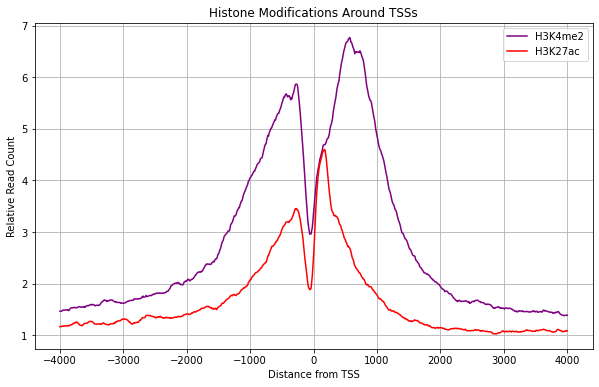

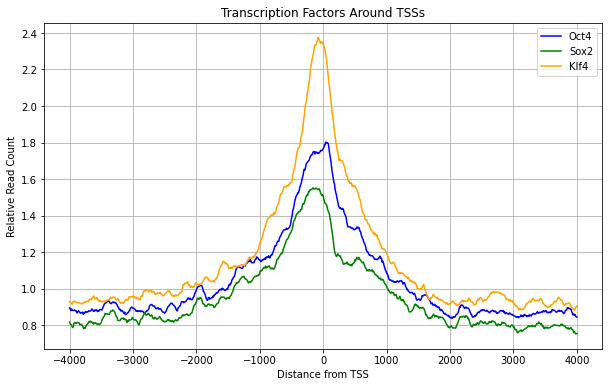

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from tss_histogram.txt (replace with your actual file path)
file_path = "tss_histogram.txt"
df = pd.read_csv(file_path, sep="\t")

# Extract relevant columns (adjust column names as needed)
columns = ["Distance from Center (cmd=annotatePeaks.pl tss /home/asheoran/public/genomes/GRCm38.fa -size 8000 -hist 10 -d /home/asheoran/lab5/tagdirs/Oct4 /home/asheoran/lab5/tagdirs/Sox2 /home/asheoran/lab5/tagdirs/Klf4 /home/asheoran/lab5/tagdirs/H3K4me2 /home/asheoran/lab5/tagdirs/H3K27ac -gtf /home/asheoran/public/genomes/GRCm38.75.gtf)", "/home/asheoran/lab5/tagdirs/Oct4 Coverage", "/home/asheoran/lab5/tagdirs/Sox2 Coverage", "/home/asheoran/lab5/tagdirs/Klf4 Coverage", "/home/asheoran/lab5/tagdirs/H3K4me2 Coverage", "/home/asheoran/lab5/tagdirs/H3K27ac Coverage"]
df_subset = df[columns]

# Set x-axis range (-4000 to +4000)
x_values = df_subset["Distance from Center (cmd=annotatePeaks.pl tss /home/asheoran/public/genomes/GRCm38.fa -size 8000 -hist 10 -d /home/asheoran/lab5/tagdirs/Oct4 /home/asheoran/lab5/tagdirs/Sox2 /home/asheoran/lab5/tagdirs/Klf4 /home/asheoran/lab5/tagdirs/H3K4me2 /home/asheoran/lab5/tagdirs/H3K27ac -gtf /home/asheoran/public/genomes/GRCm38.75.gtf)"]

# Plot each dataset - First plot for Histone Modifications
plt.figure(figsize=(10, 6))
plt.plot(x_values, df_subset["/home/asheoran/lab5/tagdirs/H3K4me2 Coverage"], label="H3K4me2", color="purple")
plt.plot(x_values, df_subset["/home/asheoran/lab5/tagdirs/H3K27ac Coverage"], label="H3K27ac", color="red")

# Customize plot
plt.xlabel("Distance from TSS")
plt.ylabel("Relative Read Count")
plt.title("Histone Modifications Around TSSs")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Second plot for Transcription Factors
plt.figure(figsize=(10, 6))
plt.plot(x_values, df_subset["/home/asheoran/lab5/tagdirs/Oct4 Coverage"], label="Oct4", color="blue")
plt.plot(x_values, df_subset["/home/asheoran/lab5/tagdirs/Sox2 Coverage"], label="Sox2", color="green")
plt.plot(x_values, df_subset["/home/asheoran/lab5/tagdirs/Klf4 Coverage"], label="Klf4", color="orange")

# Customize plot
plt.xlabel("Distance from TSS")
plt.ylabel("Relative Read Count")
plt.title("Transcription Factors Around TSSs")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


**Question#7:**
In this one I am just running what was in the report, for each of the tfs and histone modifications:

```
prefix=Klf4
findMotifsGenome.pl \
 ~/lab5/tagdirs/${prefix}/peaks.txt \
 ~/public/genomes/GRCm38.fa \
 ~/lab5/motifs/${prefix} \
 -mask -size 100
 -p 5
 ```
 

**Question#8**:
Visualizing as scatter plots

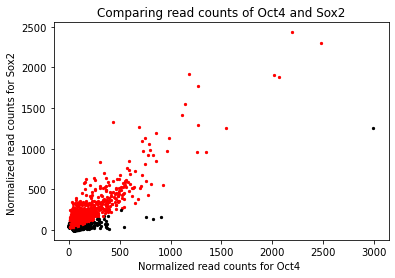

In [23]:
import matplotlib.pyplot as plt
import math
with open('oct4_sox2_scatter.txt', 'r') as file:
    # Initialize empty lists to store x and y values
    oct4values = []
    sox2values = []
    starts = []
    next(file)
    # Iterate over each row in the file
    for line in file:
        data = line.strip().split('\t')
        oct4 = float(data[-2])
        sox2 = float(data[-1])
        oct4values.append(oct4)
        sox2values.append(sox2)
        #so im making sox2 as red
        if oct4<0:
            print("NEGATIVE")
        if sox2>0 and oct4>0 and math.log2(oct4/sox2)<1:
            plt.scatter(oct4, sox2, color='red', s=5)
            starts.append(data[2])
        else:
            # Sox2 is higher or equal, color black
            plt.scatter(oct4, sox2, color='black', s=5)
# Customize plot
plt.xlabel("Normalized read counts for Oct4 ")
plt.ylabel("Normalized read counts for Sox2 ")
plt.title("Comparing read counts of Oct4 and Sox2")
#plt.legend()
plt.show()

**Question#9**:

In order to filter out 
```
awk '$11 > 2' peaks.txt > Sox2unique.txt
```

now I just run the rest of the same commands:
```
prefix=Sox2
findMotifsGenome.pl \
 ~/lab5/tagdirs/${prefix}/Sox2unique.txt \
 ~/public/genomes/GRCm38.fa \
 ~/lab5/motifs/${prefix} \
 -mask -size 100
 -p 5
```

For grading purposes only - Do not copy or edit this cell!